<a href="https://colab.research.google.com/github/rafaelarruda/Big-Five-Personality-Test/blob/main/Five_Personality_Traits(OCEAN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Big Five Personality Test
1M Answers to 50 personality items, and technical information

Dados:https://www.kaggle.com/datasets/tunguz/big-five-personality-test

Traços de teste de personalidade dos cinco grandes

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from io import open

CARREGANDO O DATASET

In [8]:
# sep='\t' = separado por tab a tabela
data = pd.read_csv('data-final.csv', sep='\t')

VERIFICANDO O DATASET

In [9]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4,1,5,2,5,1,5,2,4,1,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6.0,1.0,GB,51.5448,0.1991
1,3,5,3,4,3,3,2,5,1,5,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11.0,1.0,MY,3.1698,101.706
2,2,3,4,4,3,2,1,3,2,5,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7.0,1.0,GB,54.9119,-1.3833
3,2,2,2,3,4,2,2,4,1,4,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7.0,1.0,GB,51.75,-1.25
4,3,3,3,3,5,3,3,5,3,4,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17.0,2.0,KE,1.0,38.0


Excluindo os atributos irrelevantes

In [10]:
# excluir as colunas começando na 50 até 110, eixo 1
data.drop(data.columns[50:110], axis=1, inplace=True)

Verificando os dados

In [11]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4,1,5,2,5,1,5,2,4,1,...,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3,5,3,4,3,3,2,5,1,5,...,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2,3,4,4,3,2,1,3,2,5,...,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2,2,2,3,4,2,2,4,1,4,...,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3,3,3,3,5,3,3,5,3,4,...,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


Analise estatísticas de dados

In [12]:
# formatei o Pandas para float, com 2 casas decimais
pd.options.display.float_format = '{:.2f}'.format
data.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,12774.00,12774.00,12774.00,12774.00,12774.00,12774.00,12774.00,12774.00,12774.00,12774.00,...,12773.00,12773.00,12773.00,12773.00,12773.00,12773.00,12773.00,12773.00,12773.00,12773.00
mean,2.68,2.76,3.34,3.13,3.31,2.45,2.81,3.41,2.99,3.57,...,3.59,2.17,3.96,2.10,3.74,1.94,3.92,3.10,4.04,3.89
std,1.25,1.33,1.20,1.23,1.26,1.23,1.38,1.27,1.34,1.30,...,1.15,1.12,1.10,1.09,0.99,1.12,1.01,1.24,1.05,1.03
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,3.00,...,3.00,1.00,3.00,1.00,3.00,1.00,3.00,2.00,4.00,3.00
50%,3.00,3.00,3.00,3.00,3.00,2.00,3.00,4.00,3.00,4.00,...,4.00,2.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,4.00
75%,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,4.00,5.00,...,4.00,3.00,5.00,3.00,4.00,2.00,5.00,4.00,5.00,5.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


Verificando a contagem de registros por valor

In [13]:
# não era pra existir este '0'
data['EXT1'].value_counts()

3    3873
1    3049
4    2464
2    2340
5    1000
0      48
Name: EXT1, dtype: int64

Selecionando o total de registros com valor zero

In [14]:
data[(data == 0.00).all(axis=1)].describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,...,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00
mean,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
std,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Limpando o DataFrame com apenas registros maiores que zero

In [15]:
# Salvando na variável somente valores maiores que '0'
data = data[(data > 0.00).all(axis=1)]

Verificando a contagem de registros por valor

In [16]:
data['EXT1'].value_counts()

3    3313
1    2589
4    2124
2    2046
5     811
Name: EXT1, dtype: int64

Existem 5 traços de personalidades, então fazer 5 grupos(clusters)

Instalar yellowbrick, para os dados me mostrar quantos grupo devo utilizar com a base de dados que eu tenho.

In [17]:
pip install yellowbrick

In [18]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

Instanciando o método KMeans e o Visualizer

In [19]:
kmeans = KMeans() # k=(2,10) = testar entre 2 a 10 grupos
visualizer = KElbowVisualizer(kmeans, k=(2,10))

Separar 5mil amostras aleatórias dos dados

In [20]:
data_sample = data.sample(n=5000, random_state=1)

Executando o teste

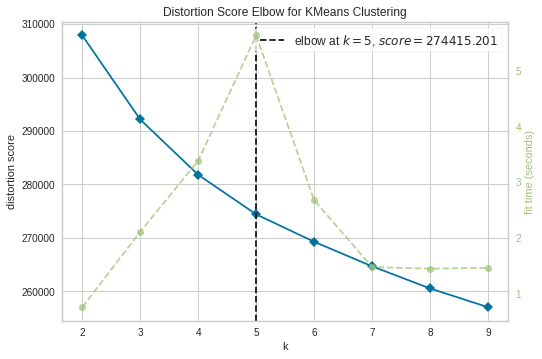

In [21]:
# treino 5mil dados
visualizer.fit(data_sample)
visualizer.poof() # mostrou 5 clusters (grupos)

Agrupando os participantes em 5 grupos

In [22]:
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(data)

Inserindo os rótulos dos clusters no dataframe

In [23]:
predicoes = k_fit.labels_
data['Clusters'] = predicoes

Veificando os dados

In [24]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Clusters
0,4,1,5,2,5,1,5,2,4,1,...,1.00,4.00,1.00,4.00,1.00,5.00,3.00,4.00,5.00,2
1,3,5,3,4,3,3,2,5,1,5,...,2.00,4.00,2.00,3.00,1.00,4.00,2.00,5.00,3.00,4
2,2,3,4,4,3,2,1,3,2,5,...,1.00,2.00,1.00,4.00,2.00,5.00,3.00,4.00,4.00,4
3,2,2,2,3,4,2,2,4,1,4,...,2.00,5.00,2.00,3.00,1.00,4.00,4.00,3.00,3.00,1
4,3,3,3,3,5,3,3,5,3,4,...,1.00,5.00,1.00,5.00,1.00,5.00,3.00,5.00,5.00,4


Analisando os grupos

Qual quantidade de observações em cada grupo?

In [25]:
data['Clusters'].value_counts()

0    2359
4    2343
3    2247
2    2200
1    1734
Name: Clusters, dtype: int64

Agrupar os registros por grupo. tirando a média

In [26]:
data.groupby('Clusters').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,
0,3.39,1.96,3.79,2.55,4.03,1.91,3.59,2.85,3.74,3.16,...,3.79,2.19,4.25,2.03,3.91,1.83,3.96,3.41,4.16,4.13
1,2.35,3.29,2.89,3.48,2.72,2.92,2.29,3.60,2.84,3.91,...,3.57,2.22,3.70,2.33,3.66,2.20,3.97,3.18,3.66,3.71
2,3.58,1.80,4.42,2.13,4.36,1.62,4.00,2.69,3.87,2.42,...,3.87,1.84,4.08,1.89,4.13,1.66,4.28,3.22,4.03,4.27
3,1.76,3.74,2.29,4.13,2.34,3.30,1.72,4.12,2.14,4.51,...,3.45,2.43,4.02,2.21,3.40,2.13,3.66,3.10,4.26,3.63
4,2.23,3.23,3.31,3.53,3.10,2.61,2.40,3.91,2.46,4.03,...,3.48,2.17,3.83,2.12,3.69,1.99,3.97,2.82,4.12,3.76


Calculando a média de cada grupo de questão para verificar um padrão

Selecionando as colunas de cada grupo

In [27]:
col_list = list(data)
# colunas 0 até 10 são ext
ext = col_list[0:10]
est = col_list[10:20] # 10 até 20 são est
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

Somando os valores de cada grupo

In [28]:
data_soma = pd.DataFrame()
data_soma['extroversion'] = data[ext].sum(axis=1)/10
data_soma['neurotic'] = data[est].sum(axis=1)/10
data_soma['agreeable'] = data[agr].sum(axis=1)/10
data_soma['conscientious'] = data[csn].sum(axis=1)/10
data_soma['open'] = data[opn].sum(axis=1)/10
data_soma['clusters'] = predicoes

Exibindo o valor médio por grupo

In [29]:
data_soma.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,3.10,3.48,3.32,3.22,3.37
1,3.03,2.72,2.98,3.02,3.22
2,3.09,2.49,3.23,3.12,3.33
3,3.01,3.64,3.17,3.17,3.23
4,3.08,2.88,3.18,3.13,3.20


Visualizando as médias por grupo

In [30]:
# passando a variável acima para outro var
data_clusters = data_soma.groupby('clusters').mean()

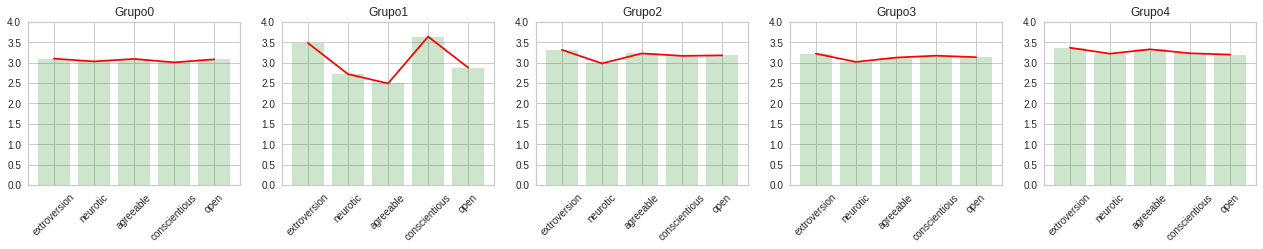

In [31]:
plt.figure(figsize=(22,3)) # tamanho do gráfico
for i in range(0,5):
    plt.subplot(1,5,i+1)
    # gráfico de barra
    plt.bar(data_clusters.columns, data_clusters.iloc[:,i], color='green', alpha=0.2)
    # gráfico de linha
    plt.plot(data_clusters.columns, data_clusters.iloc[:,i], color='red')
    plt.title('Grupo' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4) # quantidade de clusters

Instalando a biblioteca que permite criar interface

In [1]:
!pip install -q gradio

     |████████████████████████████████| 2.9 MB 5.3 MB/s 
     |████████████████████████████████| 54 kB 1.5 MB/s 
     |████████████████████████████████| 53 kB 917 kB/s 
     |████████████████████████████████| 1.1 MB 44.2 MB/s 
     |████████████████████████████████| 84 kB 2.8 MB/s 
     |████████████████████████████████| 253 kB 45.7 MB/s 
     |████████████████████████████████| 211 kB 35.7 MB/s 
     |████████████████████████████████| 2.0 MB 40.7 MB/s 
     |████████████████████████████████| 144 kB 44.7 MB/s 
     |████████████████████████████████| 271 kB 25.6 MB/s 
     |████████████████████████████████| 94 kB 2.2 MB/s 
     |████████████████████████████████| 10.9 MB 30.4 MB/s 
     |████████████████████████████████| 58 kB 1.9 MB/s 
     |████████████████████████████████| 79 kB 6.5 MB/s 
     |████████████████████████████████| 43 kB 1.7 MB/s 
     |████████████████████████████████| 61 kB 323 kB/s 
     |████████████████████████████████| 3.6 MB 30.4 MB/s 
     |████████████████████████

In [2]:
import gradio as gr

Lendo os dados com as questões

In [7]:
dicio_questions = open('questions.txt').read().split('\n')

Verificando os dados

In [32]:
dicio_questions

['EXT1\tI am the life of the party.',
 "EXT2\tI don't talk a lot.",
 'EXT3\tI feel comfortable around people.',
 'EXT4\tI keep in the background.',
 'EXT5\tI start conversations.',
 'EXT6\tI have little to say.',
 'EXT7\tI talk to a lot of different people at parties.',
 "EXT8\tI don't like to draw attention to myself.",
 "EXT9\tI don't mind being the center of attention.",
 'EXT10\tI am quiet around strangers.',
 'EST1\tI get stressed out easily.',
 'EST2\tI am relaxed most of the time.',
 'EST3\tI worry about things.',
 'EST4\tI seldom feel blue.',
 'EST5\tI am easily disturbed.',
 'EST6\tI get upset easily.',
 'EST7\tI change my mood a lot.',
 'EST8\tI have frequent mood swings.',
 'EST9\tI get irritated easily.',
 'EST10\tI often feel blue.',
 'AGR1\tI feel little concern for others.',
 'AGR2\tI am interested in people.',
 'AGR3\tI insult people.',
 "AGR4\tI sympathize with others' feelings.",
 "AGR5\tI am not interested in other people's problems.",
 'AGR6\tI have a soft heart.',


**Limpando os dados e recuperando apenas as questões**

In [33]:
questions = [] # lista vazia
for q in dicio_questions: # q recebe os dados 
    q = str(q) # transforma os dados em string
    # add a lista(find): = pega tudo depois do '\t', lstrip(excluir registros em branco)
    questions.append(q[q.find('\t'):].lstrip())

In [34]:
questions

['I am the life of the party.',
 "I don't talk a lot.",
 'I feel comfortable around people.',
 'I keep in the background.',
 'I start conversations.',
 'I have little to say.',
 'I talk to a lot of different people at parties.',
 "I don't like to draw attention to myself.",
 "I don't mind being the center of attention.",
 'I am quiet around strangers.',
 'I get stressed out easily.',
 'I am relaxed most of the time.',
 'I worry about things.',
 'I seldom feel blue.',
 'I am easily disturbed.',
 'I get upset easily.',
 'I change my mood a lot.',
 'I have frequent mood swings.',
 'I get irritated easily.',
 'I often feel blue.',
 'I feel little concern for others.',
 'I am interested in people.',
 'I insult people.',
 "I sympathize with others' feelings.",
 "I am not interested in other people's problems.",
 'I have a soft heart.',
 'I am not really interested in others.',
 'I take time out for others.',
 "I feel others' emotions.",
 'I make people feel at ease.',
 'I am always prepared.

In [35]:
inputs_questions = []
for q in questions:
    # inputs.Slider = criando slide(step=1: de 1 em 1)
    obj_input = gr.inputs.Slider(minimum=1, maximum=5, step=1, default=3,label=q)
    # add a lista o slide criado
    inputs_questions.append(obj_input)

**Verificando os inputs**

In [36]:
inputs_questions

[Slider(label="I am the life of the party."),
 Slider(label="I don't talk a lot."),
 Slider(label="I feel comfortable around people."),
 Slider(label="I keep in the background."),
 Slider(label="I start conversations."),
 Slider(label="I have little to say."),
 Slider(label="I talk to a lot of different people at parties."),
 Slider(label="I don't like to draw attention to myself."),
 Slider(label="I don't mind being the center of attention."),
 Slider(label="I am quiet around strangers."),
 Slider(label="I get stressed out easily."),
 Slider(label="I am relaxed most of the time."),
 Slider(label="I worry about things."),
 Slider(label="I seldom feel blue."),
 Slider(label="I am easily disturbed."),
 Slider(label="I get upset easily."),
 Slider(label="I change my mood a lot."),
 Slider(label="I have frequent mood swings."),
 Slider(label="I get irritated easily."),
 Slider(label="I often feel blue."),
 Slider(label="I feel little concern for others."),
 Slider(label="I am interested in

**Criando a interface e a função predict**

In [40]:
def predict(*output_questions):
  outputs_questions = np.array(outputs_questions).reshape(1,-1)
  return k_fit.predict(output_questions)

iface = gr.Interface(
    fn = predict,
    title = 'Big Five Personality',
    description='Sistema para detectar traços de personalidade.',
    inputs = inputs_questions,
    outputs='text'
)
iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://25531.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x7f0edbe53f10>,
 'http://127.0.0.1:7860/',
 'https://25531.gradio.app')

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
